# **Lineer Regression OOP Implementation in Python**

---
without using Built-in Function

---


**Emirhan Aslankarayigit**

Senior Computer Science Student

In linear regression, we use continous numeric variable instead discrete when algorithm is used.

While using linear regression algorithm, these are all attributes and methods(functions) that have to be consisted of:

---


Linear Regression Class *Attributes*:
* **Coefficients**
* **Intercepts**
* **Learning Rate** (It must be obligatory to determine learning capability whether it is much faster with high value or not...)
* **Iteration Number** (to define loop iteration on which goes through dataset.)
* **fitted** (It keeps the boolean value to check whether the model is fitted or not...)

---

Linear Regression Class Methods:
* **fit**(X,y) : to fit the data onto our model we'll improve using Gradient Descent Optimization Algorithm
* **predict**(X) : to predict the output according to our model parameters
* **mean_squared_error**(y_true, y_prediction) : After prediction, all errors on dataset will be computed by calculating the difference between the real value and predicted value. The level of model's success on dataset to predict the value regarding the model parameters will be understood by this function.
---

There must be some libraries:
* to read from data file : pandas
* to make matrix operation in an easier way : numpy
* to visualize the result and also model : matplotlib.pyplot


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class LinearRegression():
  def __init__(self, learning_rate = 0.01 ,n_iterations= 1000) :
    self.coeff = None
    self.intercept = None
    self.learning_rate = learning_rate
    self.n_iterations = n_iterations
    self.isFitted = False
  def mean_squared_error(self, y_true, y_prediction):
    error_sum = 0
    for i in range(len(y_true)):
      error_sum += (y_true[i] - y_prediction[i])**2
    return error_sum / len(y_true)

  def predict(self, X):
    return np.dot(X, self.coeff) + self.intercept



  def fit(self, X,y):
    X = np.array(X).reshape(-1, 1)
    n_samples, n_features = X.shape

    self.coeff = np.zeros(n_features)
    self.intercept = 0


    for _ in range(self.n_iterations):

      y_prediction = self.predict(X)
      #Taking derivative
      error = y_prediction - y
      dw = np.dot(X.T, error) / n_samples
      db = np.mean(error)

      #Update part
      self.coeff -= self.learning_rate * dw
      self.intercept -= self.learning_rate * db

      self.isFitted = True

DataSet Link : [Salary_dataset.csv](https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression)

In [3]:
general_data = pd.read_csv("Salary_dataset.csv")
general_data

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [4]:
input = general_data["YearsExperience"]
output = general_data["Salary"]

In [5]:
input.shape

(30,)

In [6]:
output.shape

(30,)

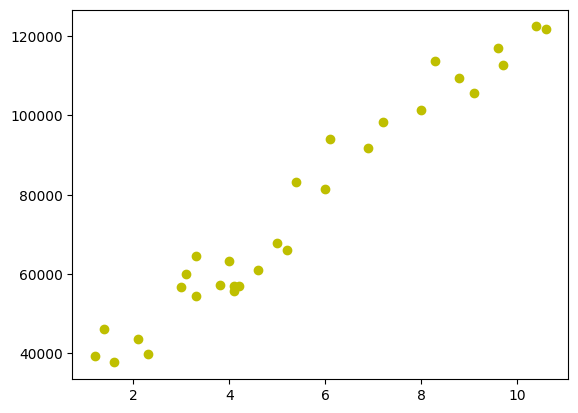

In [7]:
plt.scatter(input, output, color = "y")
plt.show()

In [8]:
lrAlg = LinearRegression()
lrAlg.fit(input, output)
print("Coefficient : " , lrAlg.coeff)
print("Intercept : " , lrAlg.intercept)

Coefficient :  [9880.81400461]
Intercept :  21912.58918422329


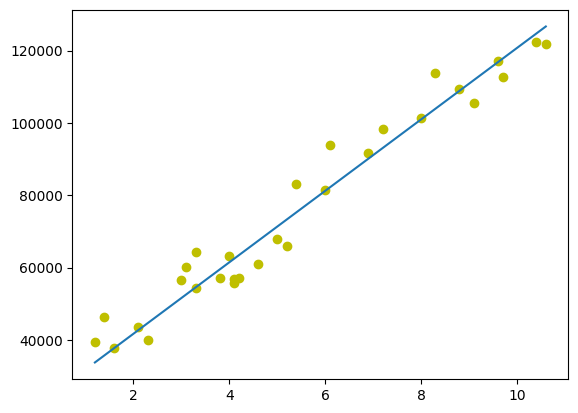

In [9]:
plt.scatter(input, output, color = "y")
plt.plot(input, input * lrAlg.coeff + lrAlg.intercept)
plt.show()